
#### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

### Our Goals of the Case Study:
To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
To adjust to if the company's requirement changes in the future so you will need to handle these as well.

#### 1. Reading and understanding the data

In [2]:
# Importing Necessary libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset file

leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking for the shape of the dataset
leads.shape

(9240, 37)

In [5]:
# checking for the data type 
leads.dtypes.value_counts()

object     30
float64     4
int64       3
Name: count, dtype: int64

In [6]:
# Checking for the size of the dataset
leads.size

341880

In [7]:
# viewing different columns names of the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Checking for the shape of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# checking for the numerical and summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# checking for the dataset type and null values present or not in the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Understanding :
The Data frame is having 9470 rows and 37 columns.

30 columns have Object type and the rest of the others are either float or integtype.

Looking into the data few fields seem to be categorical in nature.

We can see that there are missing values present in 
our data.

In [12]:
# Checking for Null value 
leads.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [13]:
# checking the percentage of null values
round(100*(leads.isnull().sum()/len(leads.index)),2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [14]:
# Checking the duplicates( only Prospect ID	and Lead Number is checked as it refers to the individuality of the lead)
print(sum(leads.duplicated(subset='Prospect ID'))==0)
print(sum(leads.duplicated(subset='Lead Number'))==0)

True
True


There is no duplicates in this file for the leads

### 2. Data Cleaning and Preparation
 

In [17]:
#dropping 'Lead Number' and 'Prospect ID' since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

### Handling the 'Select' Level in Categorical Variables
As given in the case study in many categorical columns, we notice the presence of the 'Select' value. This likely indicates that the customer did not choose an option from the provided list. Since 'Select' essentially represents missing data, we can treat these values as null and convert them accordingly.

In [19]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [20]:
# Now again Checking for Null value 
round(100*(leads.isnull().sum()/len(leads.index)),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

Our dataset contains several columns with a high percentage of missing values, making them less useful for analysis. Given that we have 9470 data points, we will remove columns where more than 45 % values are missing, as they do not provide sufficient information for meaningful insights.

In [22]:
# Drop all the columns in which greater than 45  missing values are present
#dropping cols with more than 45% missing values.

for col in leads.columns:  
    if (100 * (leads[col].isnull().sum() / len(leads))) >= 45:  
        leads.drop(col, axis=1, inplace=True)


In [23]:
round(100*(leads.isnull().sum()/len(leads.index)),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

In [24]:
# checking the value counts for each column to understand the dataframe

for column in leads:
    print(leads[column].astype('category').value_counts(dropna=False))
    print('---------------------------------------------------------------------------')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
---------------------------------------------------------------------------
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
---------------------------------------------------------------------------
Do Not Email
No     8506
Yes     734
Nam

###### Some columns have a lot of missing values, but removing those rows would cause a big data loss, especially in important columns. So instead, we will replace the missing values with 'Not Provided.' This way, we keep most of the data and reduce missing values. If these values are not useful in the model, we can remove them later

In [26]:
# Imputing the missing data in the columns with "Not Provided"

cols_to_impute = ['Country', 'Specialization', 'What matters most to you in choosing a course', 
                  'What is your current occupation']
leads[cols_to_impute]=leads[cols_to_impute].replace(np.nan,"Not Provided")

leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

# Imputing the missing data in the 'City' column with 'Mumbai' as most of the columns as 'Mumbai'
leads['City']=leads['City'].replace(np.nan,'Mumbai')

In [27]:
round(100*(leads.isnull().sum()/len(leads.index)),2).sort_values(ascending = False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
X Education Forums                               0.00
A free copy of Mastering The Interview           0.00
I agree to pay the amount through cheque         0.00
City                                             0.00
Get updates on DM Content                        0.00
Update me on Supply Chain Content                0.00
Tags                                             0.00
Receive More Updates About Our Courses           0.00
Through Recommendations                          0.00
Digital Advertisement                            0.00
Newspaper                                        0.00
Magazine                                         0.00
Newspaper Article                                0.00
Search                      

In [28]:
leads.shape

(9240, 28)

In [29]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

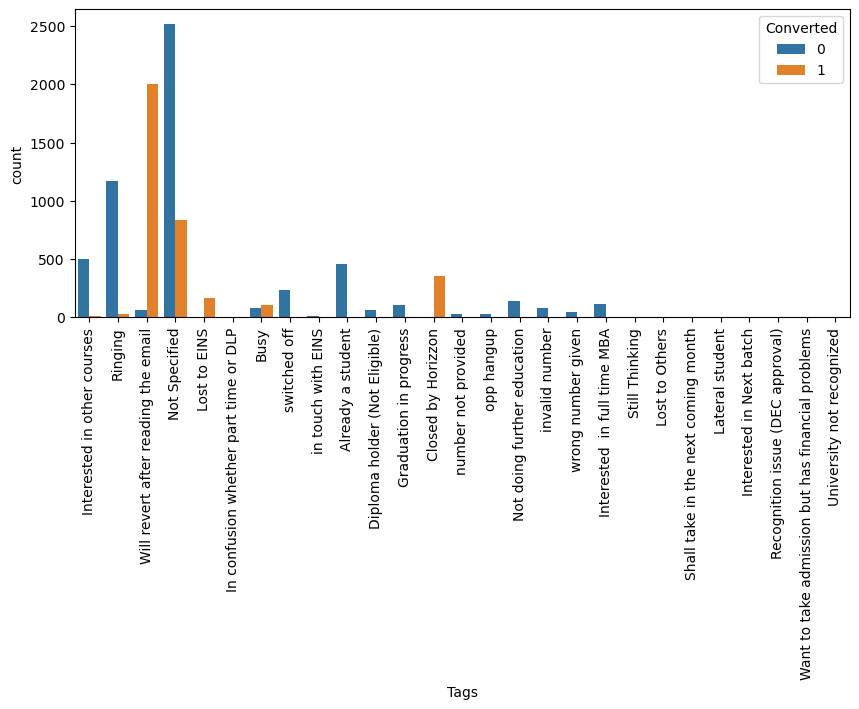

In [30]:
# visualizing the values in the column ' Tags'
plt.figure(figsize=(10, 4))
ax = sns.countplot(x=leads['Tags'], hue=leads['Converted'], data=leads)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Fix rotation
plt.show()

In [31]:
# cleaning the Tag values with low values to a common tag 'other Tags'
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS', 'Diploma holder (Not Eligible)',
    'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup', 'Still Thinking','Lost to Others', 
    'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch','Recognition issue (DEC approval)', 
    'Want to take admission but has financial problems','University not recognized', 'switched off', 'Already a student',
    'Not doing further education','invalid number', 'wrong number given', 'Interested  in full time MBA'], 'Other_Tags')
leads['Tags'].value_counts()

Tags
Not Specified                          3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: count, dtype: int64

In [32]:
# Cleaning the country column as many countries is provided 
leads['Country']= np.where(leads['Country'] == 'India','India',
                           np.where(leads['Country'] == 'Not Provided','Not Provided','Outside India'))

leads['Country'].value_counts()

Country
India            6492
Not Provided     2461
Outside India     287
Name: count, dtype: int64

In [33]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


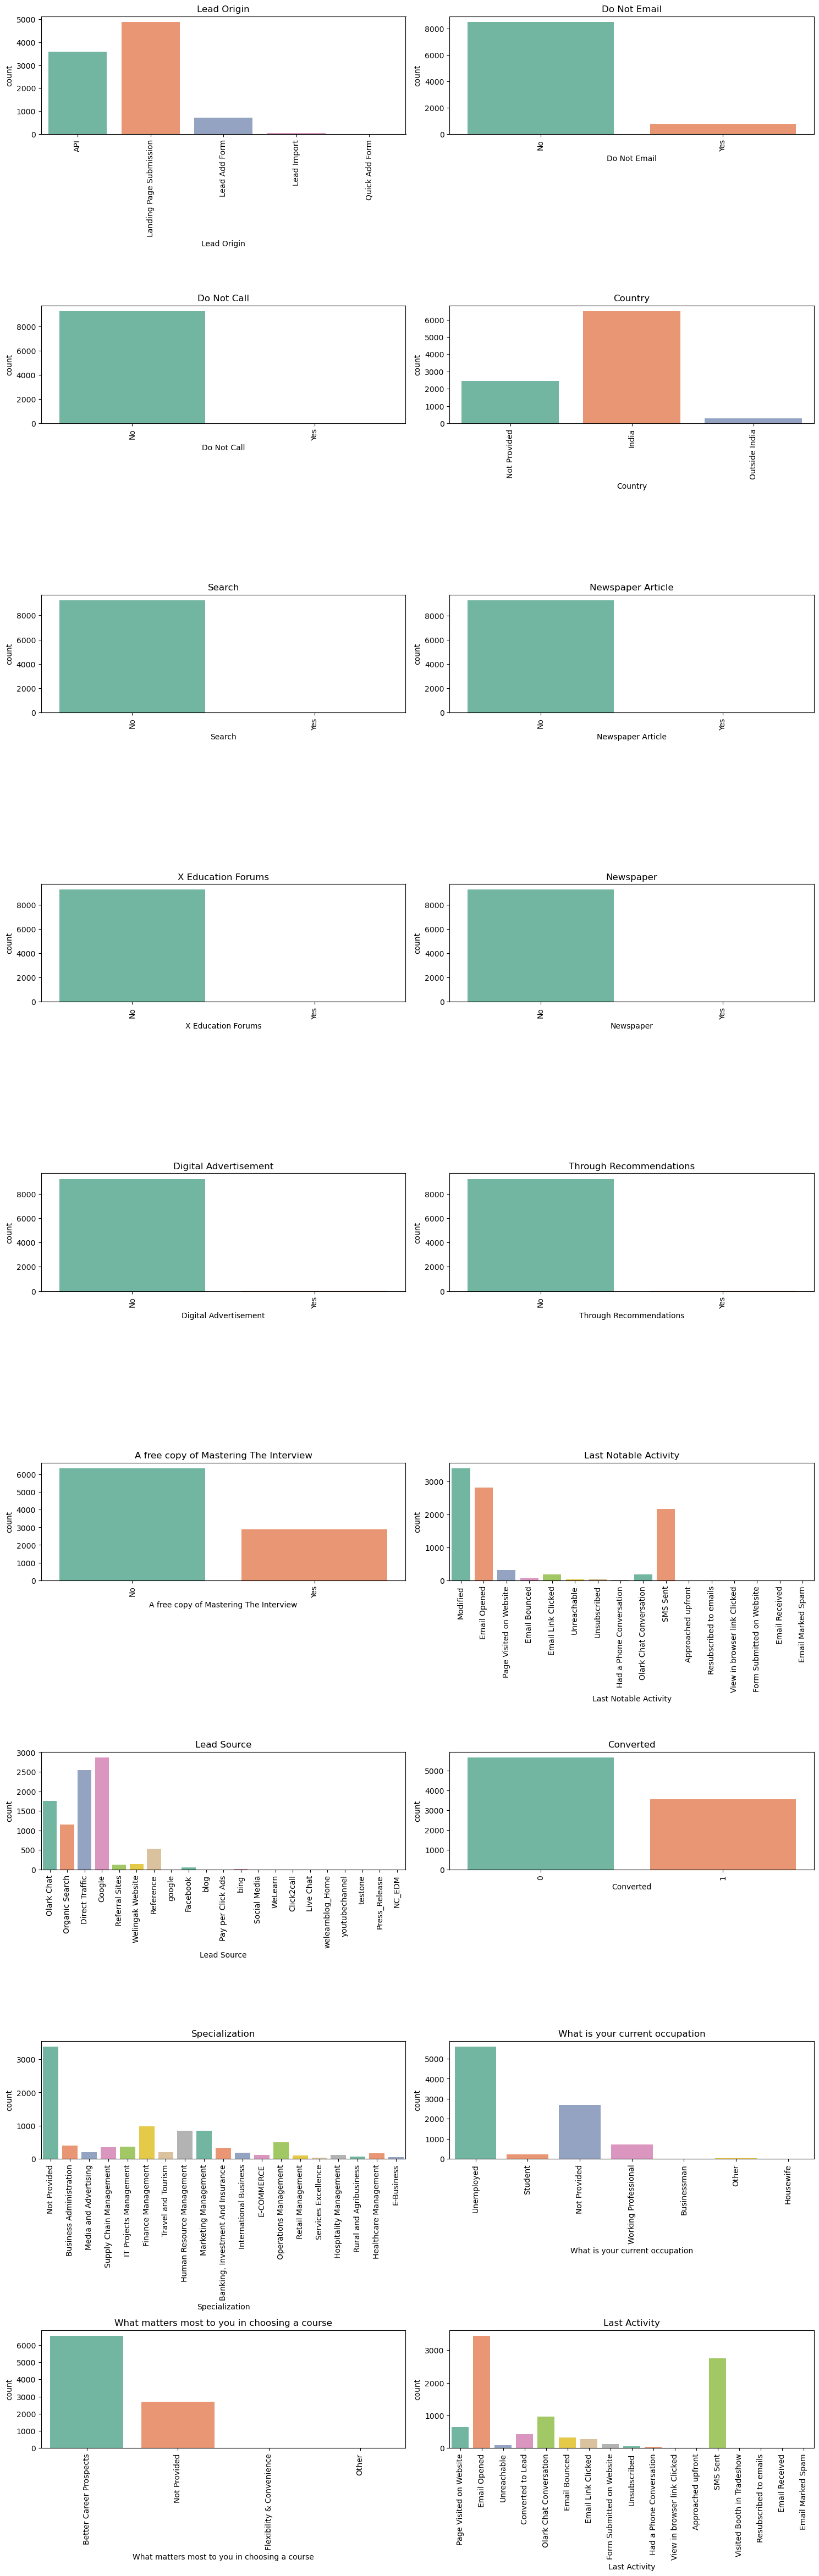

In [34]:
# plotting of categorical columns

# List of columns to plot
columns = ['Lead Origin', 'Do Not Email', 'Do Not Call', 'Country', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper', 
           'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity','Lead Source',
           'Converted','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Activity']
plt.figure(figsize=[15,50])
for i, col in enumerate(columns, 1):
    plt.subplot(10, 2, i)
    ax = sns.countplot(data=leads, x=leads[col], palette="Set2")  # Changed df to leads
    plt.title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Fix rotation issue

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

(0.0, 20.0)

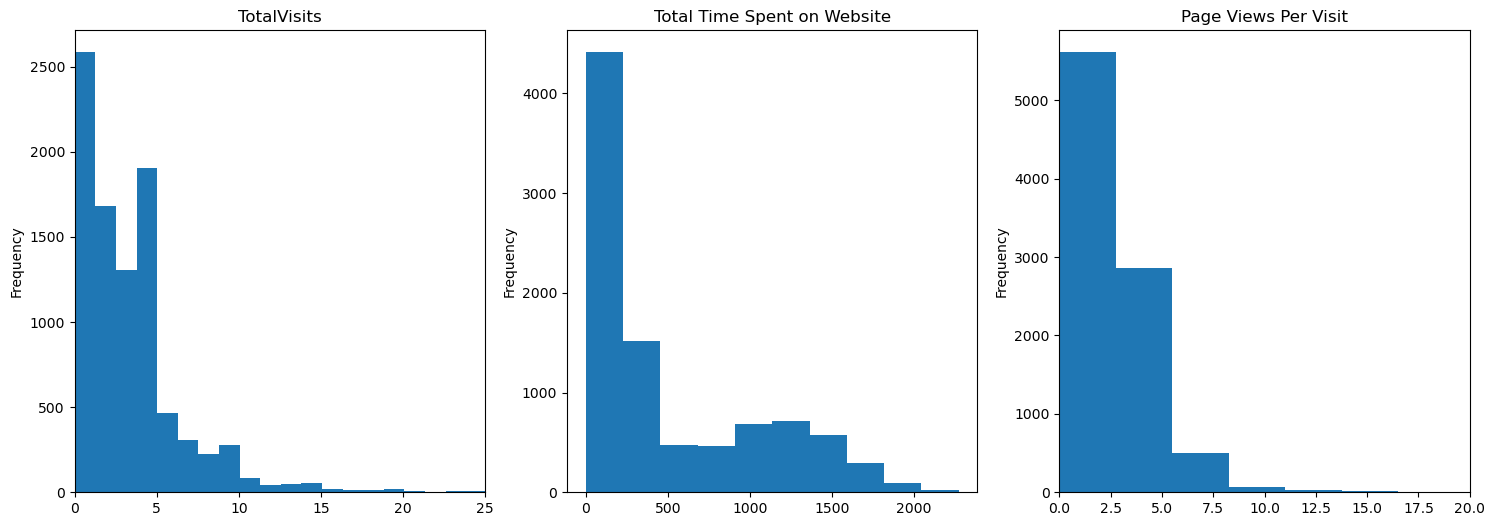

In [35]:
# Ploting the Numerical variables
plt.figure(figsize=[18,6])
plt.subplot(1, 3, 1, title= 'TotalVisits')
leads['TotalVisits'].plot.hist(bins = 200)
plt.xlim(0,25)

plt.subplot(1, 3, 2, title= 'Total Time Spent on Website')
leads['Total Time Spent on Website'].plot.hist(bins=10)

plt.subplot(1, 3, 3, title= 'Page Views Per Visit')
leads['Page Views Per Visit'].plot.hist(bins=20)
plt.xlim(0,20)

### Now analyzing all the categorical variables with the target column "Converted" the Y Variable.
- Converted is the target variable, Indicates whether a lead has been successfully converted Yes (1) or No (0)

In [37]:
# Current Lead conversion rate as by the data 

LCR = (sum(leads['Converted'])/len(leads['Converted'].index))*100
round(LCR, 2)

38.54

- The Lead Converstion rate is 38.54%

In [39]:
leads['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [40]:
#  cleaning the Lead Source values with low frequency to a common name 'Others'
leads['Lead Source'] = leads['Lead Source'].fillna('Others')
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook', 'Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(
    ['bing', 'Click2call', 'Press_Release', 'youtubechannel', 'welearnblog_Home',
     'WeLearn', 'blog', 'Pay per Click Ads', 'testone', 'NC_EDM'], 'Others')

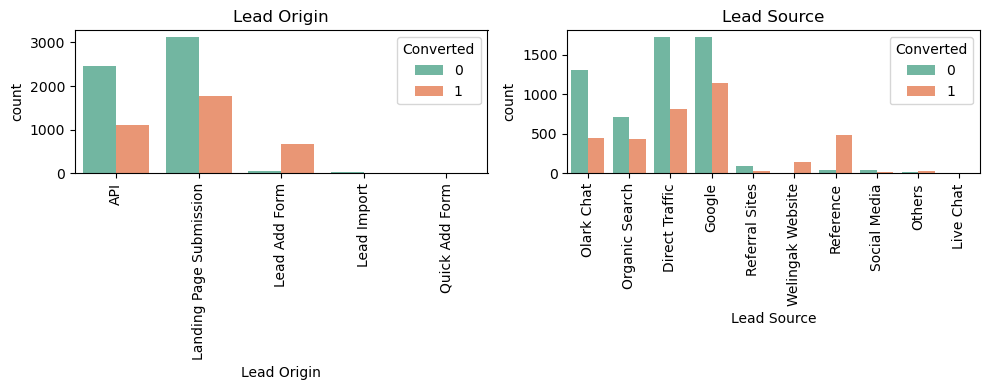

In [41]:
#visualizing Lead Origin & Lead Source Variable based on Converted value
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Lead Origin', hue='Converted', data=leads, palette='Set2')
plt.xticks(rotation=90)
plt.title('Lead Origin')

plt.subplot(1, 2, 2)
sns.countplot(x='Lead Source', hue='Converted', data=leads, palette='Set2')
plt.xticks(rotation=90)
plt.title('Lead Source')

plt.tight_layout()
plt.show()

#### Inference from Lead Origin:
- API and Landing Page Submissions have a 30-35% conversion rate with a significant lead count.
- Lead Add Form has a 90%+ conversion rate, but fewer leads.
- Lead Import and Quick Add Form generate very few leads.
#### Inference from Lead Source:
- Most leads come from Google and Direct Traffic.
- Reference leads and Welingak website have high conversion rates.
- Focus on improving conversion for Olark Chat, Organic Search, Direct Traffic, and Google, while increasing Reference and Welingak website leads.

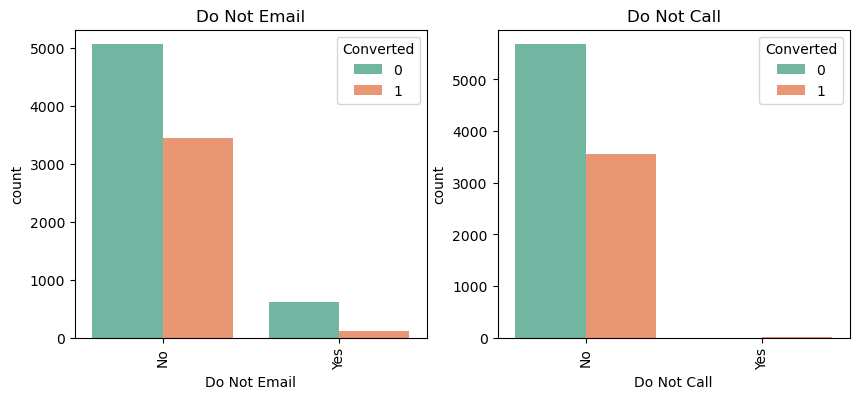

In [43]:
#visualizing Do Not Email & Do Not Call Variable based on Converted value

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Email', hue='Converted', data=leads, palette='Set2').tick_params(axis='x', rotation=90)
plt.title('Do Not Email')

plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Call', hue='Converted', data=leads, palette='Set2').tick_params(axis='x', rotation=90)
plt.title('Do Not Call')

plt.show()

#### Inference
- 
Most entries are 'No'. No Inference can be drawn with this parameter and can be removed this feature.

In [45]:
#  cleaning the Last Activity values with low frequency to a common name 'Others'
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable', 'Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                         'View in browser link Clicked','Email Marked Spam', 'Email Received', 'Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'], 'Others')


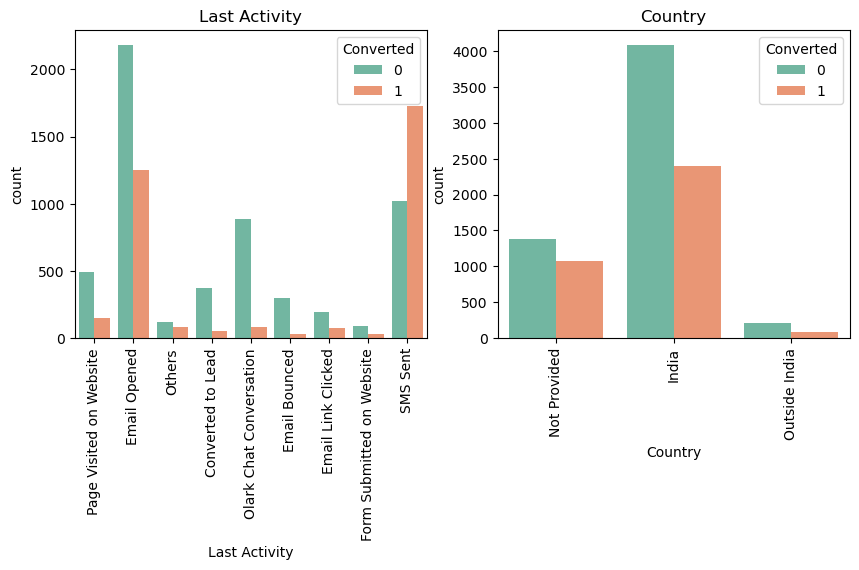

In [46]:
#visualizing Last activity and country Variable based on Converted value

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Last Activity', hue='Converted', data=leads, palette='Set2').tick_params(axis='x', rotation=90)
plt.title('Last Activity')

plt.subplot(1, 2, 2)
sns.countplot(x='Country', hue='Converted', data=leads, palette='Set2').tick_params(axis='x', rotation=90)
plt.title('Country')

plt.show()

#### Inference
- Most leads had their last activity as "Email Opened."
- Leads with "SMS Sent" have a ~60% conversion rate.
- Since most leads are from India, country-based insights are limited.

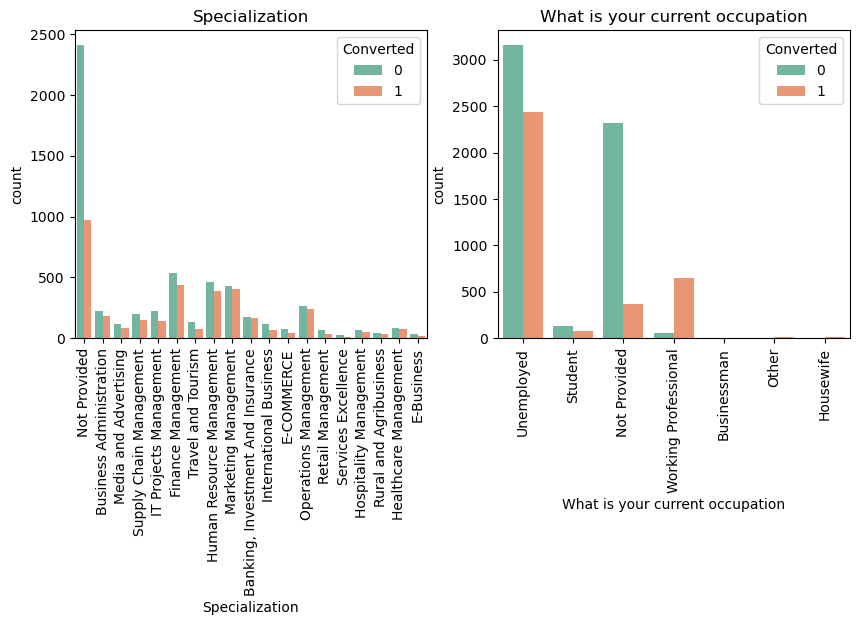

In [48]:
#visualizing Specialization and What is your current occupation Variable based on Converted value

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='Specialization', hue='Converted', data=leads, palette='Set2').tick_params(axis='x', rotation=90)
plt.title('Specialization')

plt.subplot(1, 2, 2)
sns.countplot(x='What is your current occupation', hue='Converted', data=leads, palette='Set2').tick_params(axis='x', rotation=90)
plt.title('What is your current occupation')

plt.show()

Inference

- Focus should be more on the Specialization with high conversion rate.
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers.
- We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped

Text(0.5, 1.0, 'Specialization')

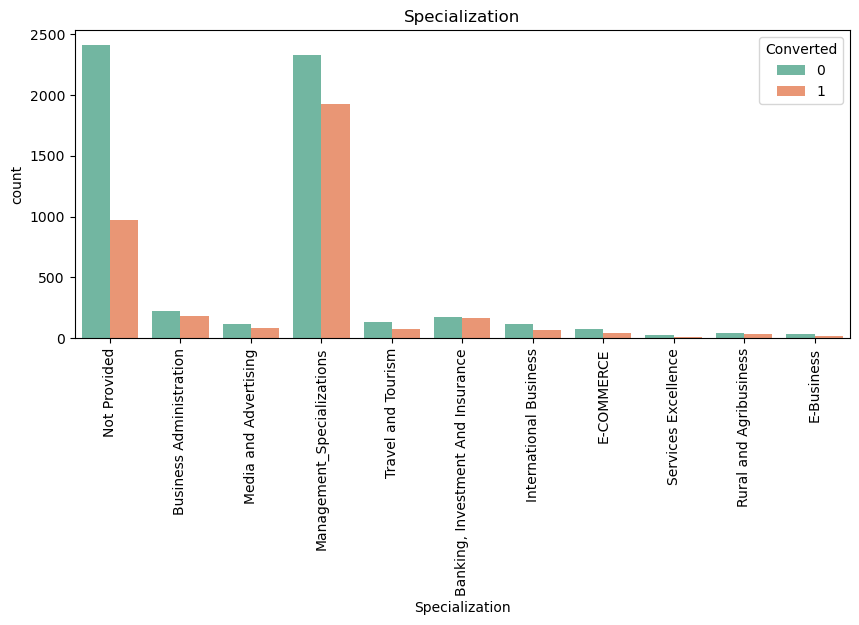

In [50]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management',
                                                           'Operations Management','IT Projects Management', 'Supply Chain Management',
                                                           'Healthcare Management', 'Hospitality Management', 'Retail Management'],
                                                          'Management_Specializations')

#visualizing the Specialization again based on Converted value
plt.figure(figsize = (10,4))
sns.countplot(x='Specialization', hue='Converted', data= leads, palette='Set2').tick_params(axis='x', rotation = 90)
plt.title('Specialization')

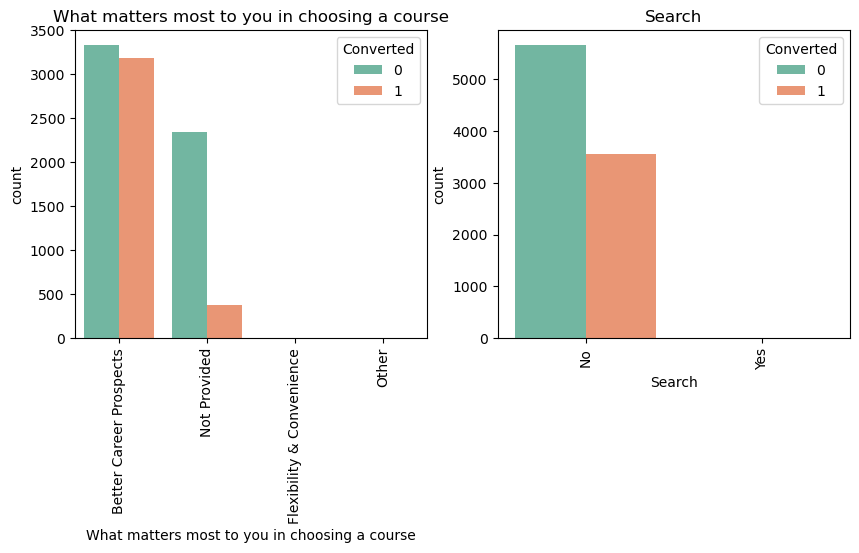

In [51]:
#visualizing What matters most to you in choosing a course and Search Variable based on Converted value


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=leads, palette='Set2').tick_params(axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1, 2, 2)
sns.countplot(x='Search', hue='Converted', data=leads, palette='Set2').tick_params(axis='x', rotation=90)
plt.title('Search')

plt.show()

- We can see that Those highly skewed column so we can remove this column.

In [53]:
#  cleaning the Last Notable Activity values with low frequency to a common name 'Other_Notable_activity'

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed',
                                                                         'Email Bounced','Resubscribed to emails','View in browser link Clicked',
                                                                         'Approached upfront','Form Submitted on Website','Email Received'],'Other_Notable_activity')

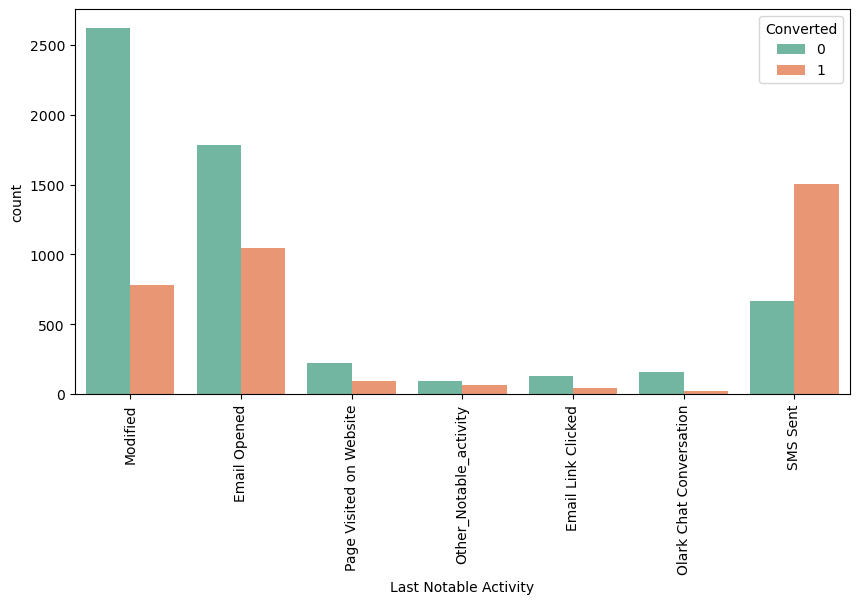

In [54]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (10,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads, palette='Set2')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [55]:
# Adding imbalanced columns to the list of columns to be dropped.
# Below are the list of column found to be imbalance and can not drawn any inferances hence dropping.
col_2_drop = ['Country','What matters most to you in choosing a course',
                'Do Not Call',
                'Search',
                'Magazine',
                'Newspaper Article',
                'X Education Forums',
                'Newspaper',
                'Digital Advertisement',
                'Through Recommendations',
                'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content',
                'Get updates on DM Content',
                'I agree to pay the amount through cheque']

In [56]:
#Dropping Imbalanced columns identied
leads.drop(col_2_drop,axis=1,inplace= True)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [57]:
leads.shape

(9240, 14)

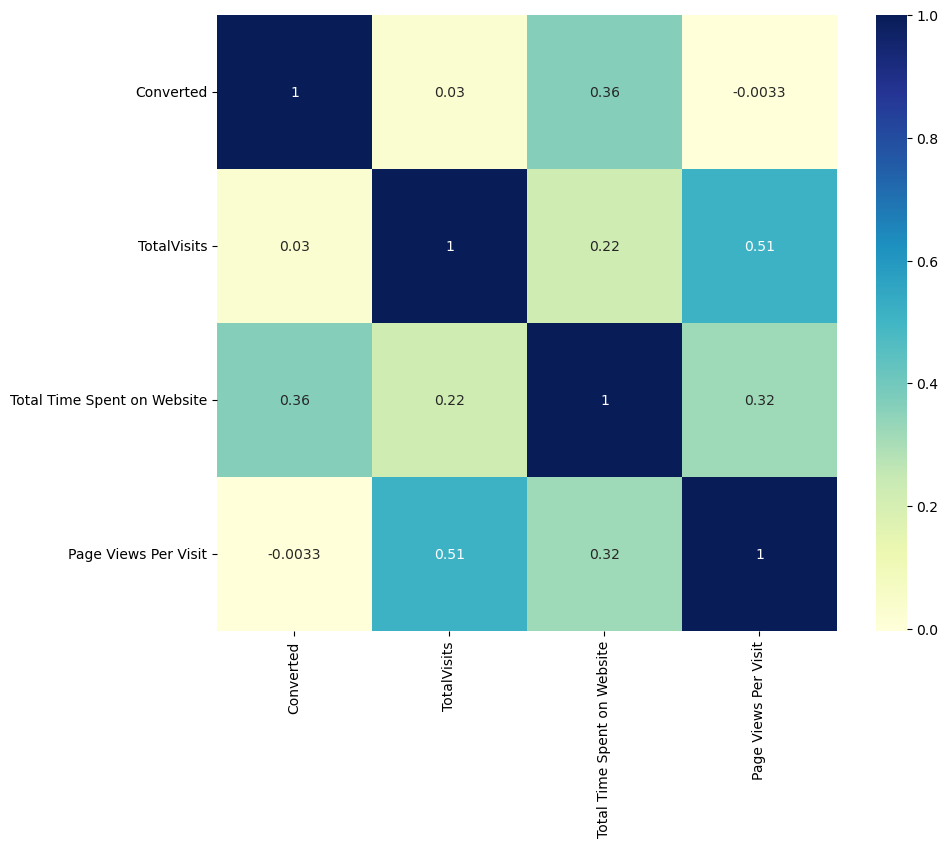

In [58]:
# checking correlation of numerical values
# figure size
plt.figure(figsize=(10,8))
sns.heatmap(leads.select_dtypes(include=['number']).corr(), cmap="YlGnBu", annot=True)
plt.show()


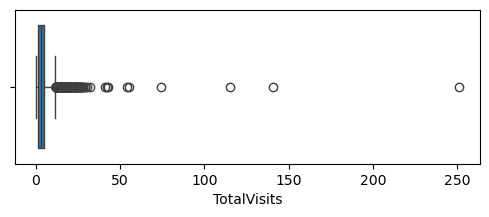

In [59]:
# checking for the outliers 

#Total Visits
plt.figure(figsize=(6,2))
sns.boxplot(x=leads['TotalVisits'])
plt.show()


In [60]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

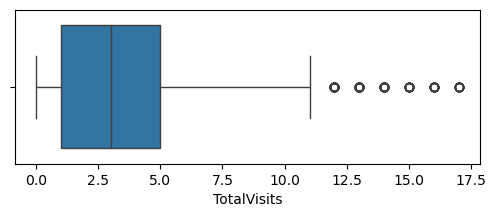

In [61]:
#Remove top & bottom 1% of the Column Outlier values

Qt3 = leads['TotalVisits'].quantile(0.99)
leads = leads[leads['TotalVisits'] <= Qt3]

Qt1 = leads['TotalVisits'].quantile(0.01)
leads = leads[leads['TotalVisits'] >= Qt1]

plt.figure(figsize=(6,2))
sns.boxplot(x=leads['TotalVisits'])
plt.show()

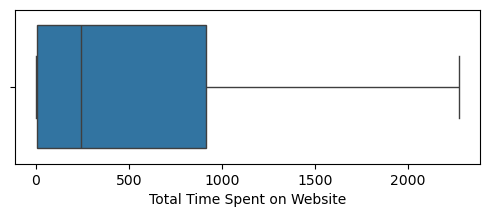

In [62]:
#Total Time Spent on Website- Outliers check
plt.figure(figsize=(6,2))
sns.boxplot(x=leads['Total Time Spent on Website'])
plt.show()

No such outliers , so no ouier treatment required

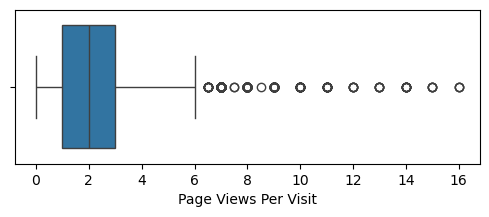

In [64]:
#Page Views Per Visit- Outliers check
plt.figure(figsize=(6,2))
sns.boxplot(x=leads['Page Views Per Visit'])
plt.show()

In [65]:
#checking percentiles for "Page Views Per Visit"

leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

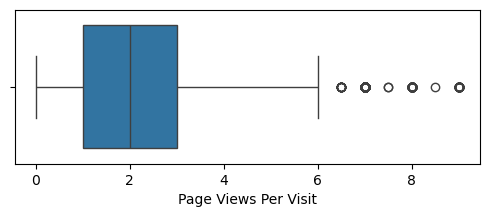

In [66]:
#Remove top & bottom 1% to treat the outliers

Qt3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Qt3]

Qt1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Qt1]

plt.figure(figsize=(6,2))
sns.boxplot(x=leads['Page Views Per Visit'])
plt.show()

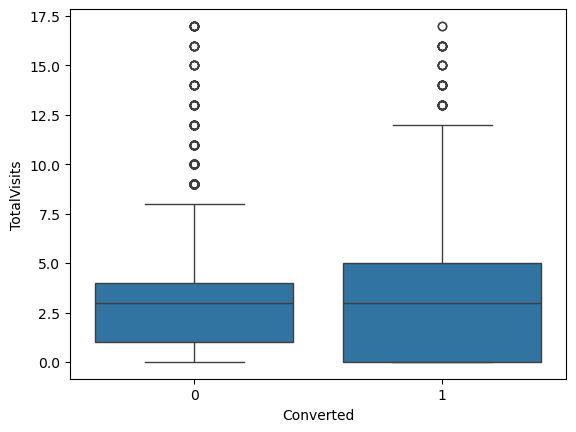

In [67]:
#checking Spread of "Total Visits" vs Converted variable

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

#### Inferance
- The median values for converted and non-converted leads are similar
- No clear insights can be drawn from Total visitsits

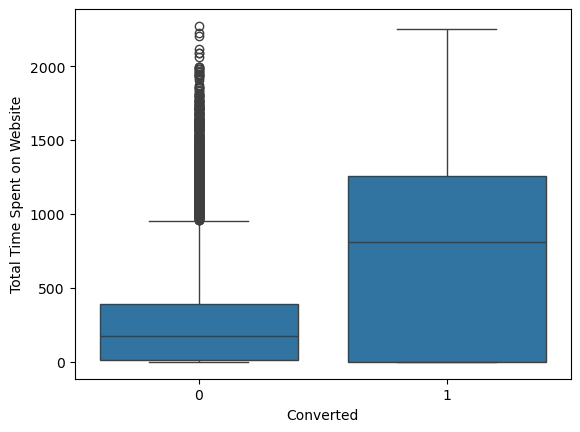

In [69]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
sns.boxplot(x = 'Converted', y='Total Time Spent on Website', data = leads)
plt.show()

__Inference__

1. Leads spending more time on the website are more likely to be converted.
2. Website should be made more engaging to make leads spend more time.

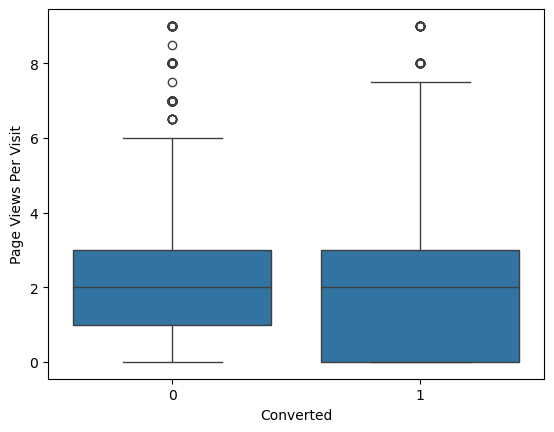

In [71]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(x = 'Converted', y='Page Views Per Visit', data = leads)
plt.show()

__Inference__

1. Median for converted and unconverted leads is the same.
2. Nothing can be said specifically for lead conversion from Page Views Per Visit

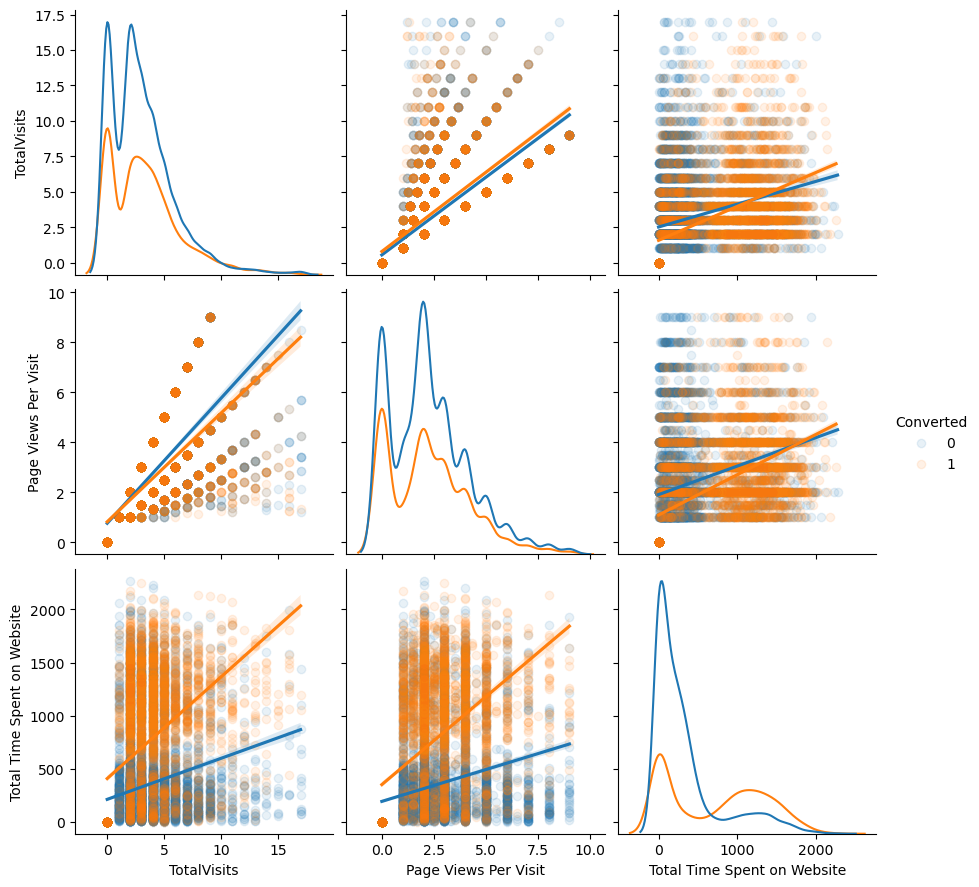

In [73]:
# Bivariate Analysis after cleaning the data

num_df = leads[['TotalVisits',  'Page Views Per Visit', 'Total Time Spent on Website']]
sns.pairplot(data=leads, vars=num_df, hue='Converted', kind='reg', height=3,plot_kws={'scatter_kws': {'alpha': 0.1}}, diag_kws=dict(fill=False))
plt.show()

In [74]:
#checking missing values in leftover columns/

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [75]:
#Getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [76]:
# List of variables to map categorical variables

var_list =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_conv(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[var_list] = leads[var_list].apply(binary_conv)

In [77]:
# Creating a dummy variable for the categorical variables and dropping the first one.

dummy_df = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity',
                            'Specialization', 'What is your current occupation', 'Tags', 'City',
                            'Last Notable Activity']], drop_first=True)
dummy_df= dummy_df.astype(int)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [78]:
# Concatenating the dummy_df to the cleaned(df) dataframe

leads= pd.concat([leads, dummy_df], axis=1)
leads.head()



,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [79]:
# Dropping the columns for which dummies were created above.
leads= leads.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                'Specialization', 'What is your current occupation', 'Tags', 'City',
                'Last Notable Activity'], axis = 1)

In [80]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# Building the Predictive Model

#### Splitting into Train and Test & Importing the Logistic Regression Model

In [82]:
# Importing the train_test_split from sklearn

from sklearn.model_selection import train_test_split

In [83]:

# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [84]:
# Putting the Features to x
X = leads.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [85]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 9196 to 5825
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6267 non-null   int64  
 1   TotalVisits                                           6267 non-null   float64
 2   Total Time Spent on Website                           6267 non-null   int64  
 3   Page Views Per Visit                                  6267 non-null   float64
 4   A free copy of Mastering The Interview                6267 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6267 non-null   int32  
 6   Lead Origin_Lead Add Form                             6267 non-null   int32  
 7   Lead Origin_Lead Import                               6267 non-null   int32  
 8   Lead Source_Google                                    6267 n

### Scaling
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables. We will perform scaling on the Continuous numerical variables

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,-0.28572,0.668862,1.848117,1.455819,-0.667339,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4696,-0.28572,-0.030697,-0.037832,0.399961,-0.667339,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3274,-0.28572,0.319082,-0.642138,-0.127967,-0.667339,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2164,-0.28572,-0.380477,-0.154676,-0.127967,-0.667339,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1667,-0.28572,0.319082,1.258415,-0.481679,-0.667339,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0


#### Looking at the correlations
Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

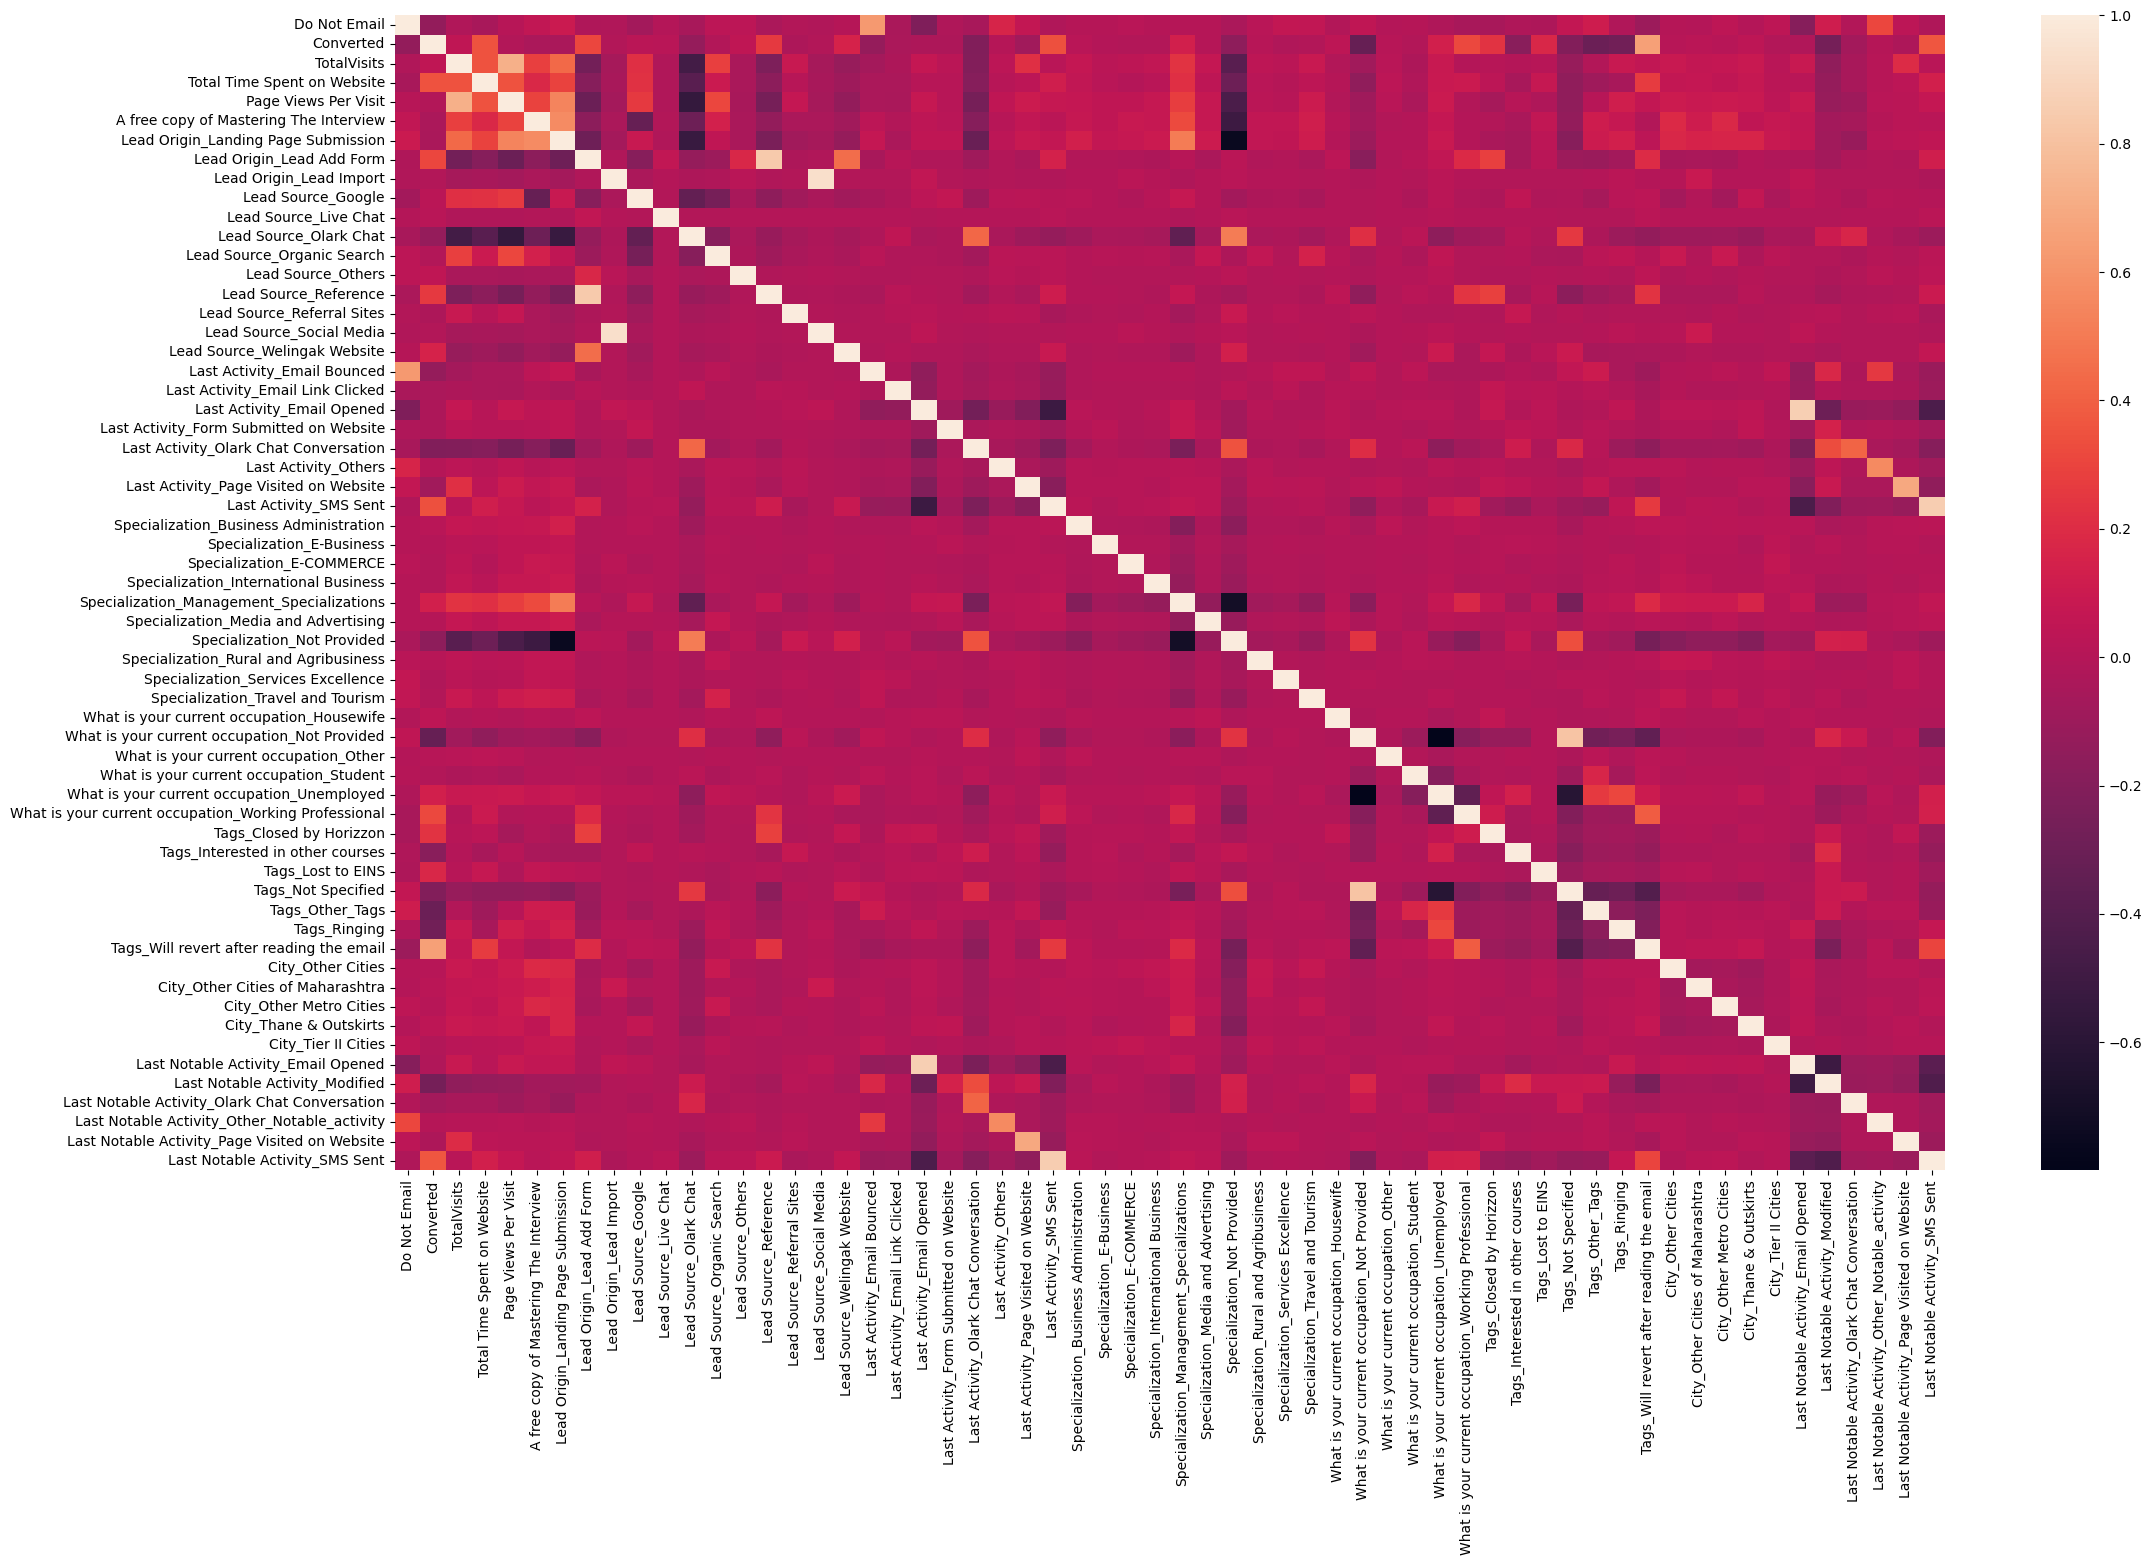

In [90]:
# Looking at the correlation table

plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()


# Model Building using Stats Model & RFE:

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

#### Feature Selection Using RFE

In [93]:
# Importing the stats model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [94]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 17),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 25),
 ('A free copy of Mastering The Interview', False, 28),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 10),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 15),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 42),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Others', False, 16),
 ('Last Activity_Page V

In [95]:
#list of RFE supported columns
rfe_fet = X_train.columns[rfe.support_]
rfe_fet

Index(['Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'What is your current occupation_Not Provided',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [97]:
# Building Model 1

X_train_sm = sm.add_constant(X_train[rfe_fet])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1259.3
Date:                Tue, 18 Feb 2025   Deviance:                       2518.6
Time:                        11:24:06   Pearson chi2:                 9.86e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6042
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.1323      0.164     -6.887      0.000      -1.455      -0.810
Lead Origin_Lead Add Form                        0.5797      0.443      1.310      0.190      -0.288       1.447
Lead Source_Olark Chat                          -0.0662      0.130     -0.507      0.612      -0.322       0.189
Lead Source_Welingak Website                     3.0136      1.113      2.707      0.007       0.832       5.196
Last Activity_Email Bounced                     -1.3042      0.480     -2.716      0.007      -2.246      -0.363
Last Activity_Email Opened                       1.2897      0.154      8.374      0.000       0.988       1.592
Last Activity_SMS Sent                           1.5994      0.230      6.956      0.000       1.149       2.050
What is your current occupation_Not Provided    -2.2265      0.132    -16.866      0.000      -2.485      -1.968
Tags_Closed by Horizzon                          5.5270      1.022      5.410      0.000       3.525       7.529
Tags_Interested in other courses                -3.4681      0.382     -9.084      0.000      -4.216      -2.720
Tags_Lost to EINS                                5.1765      0.627      8.262      0.000       3.948       6.405
Tags_Other_Tags                                 -3.9305      0.220    -17.834      0.000      -4.363      -3.499
Tags_Ringing                                    -4.8959      0.251    -19.513      0.000      -5.388      -4.404
Tags_Will revert after reading the email         3.0399      0.197     15.393      0.000       2.653       3.427
Last Notable Activity_Other_Notable_activity     1.7276      0.430      4.022      0.000       0.886       2.569
Last Notable Activity_SMS Sent                   1.9288      0.213      9.064      0.000       1.512       2.346
================================================================================================================
"""

These variables 'Lead Origin_Lead Add Form' (P = 0.190) and 'Lead Source_Olark Chat' (P = 0.612) are not statistically significant and can be considered for removal.

In [99]:
# removnig Lead Source_Olark Chat' (P = 0.612) 
rfe_fet = list(rfe_fet)  # Convert Index to list (if needed)
rfe_fet.remove('Lead Source_Olark Chat')

In [100]:
# Building Model 2

X_train_sm = sm.add_constant(X_train[rfe_fet])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1259.4
Date:                Tue, 18 Feb 2025   Deviance:                       2518.9
Time:                        11:24:06   Pearson chi2:                 9.89e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6042
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.1587      0.156     -7.425      0.000      -1.465      -0.853
Lead Origin_Lead Add Form                        0.5851      0.443      1.322      0.186      -0.282       1.452
Lead Source_Welingak Website                     3.0290      1.113      2.721      0.006       0.848       5.211
Last Activity_Email Bounced                     -1.3010      0.481     -2.705      0.007      -2.244      -0.358
Last Activity_Email Opened                       1.2943      0.154      8.425      0.000       0.993       1.595
Last Activity_SMS Sent                           1.6145      0.228      7.081      0.000       1.168       2.061
What is your current occupation_Not Provided    -2.2243      0.132    -16.862      0.000      -2.483      -1.966
Tags_Closed by Horizzon                          5.5452      1.021      5.431      0.000       3.544       7.546
Tags_Interested in other courses                -3.4588      0.381     -9.069      0.000      -4.206      -2.711
Tags_Lost to EINS                                5.1846      0.626      8.275      0.000       3.957       6.412
Tags_Other_Tags                                 -3.9190      0.219    -17.882      0.000      -4.349      -3.489
Tags_Ringing                                    -4.8872      0.250    -19.524      0.000      -5.378      -4.397
Tags_Will revert after reading the email         3.0551      0.195     15.641      0.000       2.672       3.438
Last Notable Activity_Other_Notable_activity     1.7375      0.430      4.045      0.000       0.895       2.579
Last Notable Activity_SMS Sent                   1.9248      0.213      9.050      0.000       1.508       2.342
================================================================================================================
"""

In [101]:
# removnig Lead Source_Olark Chat' (P = 0.612) 
rfe_fet.remove('Lead Origin_Lead Add Form')

In [102]:
# Building Model 3

X_train_sm = sm.add_constant(X_train[rfe_fet])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.4
Date:                Tue, 18 Feb 2025   Deviance:                       2520.7
Time:                        11:24:06   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6040
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.1618      0.156     -7.433      0.000      -1.468      -0.855
Lead Source_Welingak Website                     3.6074      1.023      3.525      0.000       1.602       5.613
Last Activity_Email Bounced                     -1.3133      0.483     -2.718      0.007      -2.260      -0.366
Last Activity_Email Opened                       1.3065      0.154      8.495      0.000       1.005       1.608
Last Activity_SMS Sent                           1.6279      0.228      7.148      0.000       1.182       2.074
What is your current occupation_Not Provided    -2.2327      0.132    -16.936      0.000      -2.491      -1.974
Tags_Closed by Horizzon                          5.7599      1.012      5.692      0.000       3.777       7.743
Tags_Interested in other courses                -3.4583      0.382     -9.065      0.000      -4.206      -2.711
Tags_Lost to EINS                                5.1963      0.627      8.292      0.000       3.968       6.425
Tags_Other_Tags                                 -3.9204      0.219    -17.897      0.000      -4.350      -3.491
Tags_Ringing                                    -4.8740      0.250    -19.531      0.000      -5.363      -4.385
Tags_Will revert after reading the email         3.0989      0.193     16.027      0.000       2.720       3.478
Last Notable Activity_Other_Notable_activity     1.7496      0.430      4.072      0.000       0.907       2.592
Last Notable Activity_SMS Sent                   1.9264      0.212      9.073      0.000       1.510       2.343
================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [104]:
# Function to calculate VIF of variables

def Calculate_VIF(leads):
    vif = pd.DataFrame()
    vif['Features'] = leads.columns
    vif['VIF'] = [variance_inflation_factor(leads.values, i) for i in range(leads.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [105]:
# importing libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
# Checking for the VIF values of the feature variables.
Calculate_VIF(X_train[rfe_fet])

,Features,VIF
3,Last Activity_SMS Sent,5.83
12,Last Notable Activity_SMS Sent,5.21
2,Last Activity_Email Opened,2.00
10,Tags_Will revert after reading the email,1.80
4,What is your current occupation_Not Provided,1.46
9,Tags_Ringing,1.36
8,Tags_Other_Tags,1.25
1,Last Activity_Email Bounced,1.15
11,Last Notable Activity_Other_Notable_activity,1.11
5,Tags_Closed by Horizzon,1.07


VIFs seem to be in a decent range except for two variables.

Let's first drop the variable 'Last Activity_SMS Sent' since it has a high VIF.

In [108]:
#dropping column with high VIF
rfe_fet.remove('Last Activity_SMS Sent')

In [109]:
# Building Model 4

X_train_sm = sm.add_constant(X_train[rfe_fet])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.4
Date:                Tue, 18 Feb 2025   Deviance:                       2568.8
Time:                        11:24:07   Pearson chi2:                 1.00e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6010
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.7524      0.135     -5.567      0.000      -1.017      -0.488
Lead Source_Welingak Website                     3.7037      1.021      3.628      0.000       1.703       5.705
Last Activity_Email Bounced                     -1.5579      0.471     -3.307      0.001      -2.481      -0.635
Last Activity_Email Opened                       0.8801      0.132      6.661      0.000       0.621       1.139
What is your current occupation_Not Provided    -2.1870      0.129    -16.931      0.000      -2.440      -1.934
Tags_Closed by Horizzon                          5.6060      1.010      5.552      0.000       3.627       7.585
Tags_Interested in other courses                -3.5073      0.379     -9.245      0.000      -4.251      -2.764
Tags_Lost to EINS                                5.0489      0.617      8.177      0.000       3.839       6.259
Tags_Other_Tags                                 -3.9034      0.218    -17.946      0.000      -4.330      -3.477
Tags_Ringing                                    -4.8438      0.249    -19.486      0.000      -5.331      -4.357
Tags_Will revert after reading the email         3.0728      0.190     16.168      0.000       2.700       3.445
Last Notable Activity_Other_Notable_activity     1.4194      0.419      3.389      0.001       0.599       2.240
Last Notable Activity_SMS Sent                   3.1164      0.152     20.474      0.000       2.818       3.415
================================================================================================================
"""

In [110]:
# Checking for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

Calculate_VIF(X_train[rfe_fet])

,Features,VIF
2,Last Activity_Email Opened,1.86
11,Last Notable Activity_SMS Sent,1.70
9,Tags_Will revert after reading the email,1.69
3,What is your current occupation_Not Provided,1.32
8,Tags_Ringing,1.31
7,Tags_Other_Tags,1.20
1,Last Activity_Email Bounced,1.15
10,Last Notable Activity_Other_Notable_activity,1.11
4,Tags_Closed by Horizzon,1.05
0,Lead Source_Welingak Website,1.04


## Model Evaluation

In [112]:
# Getting the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.077286
4696    0.077286
3274    0.544117
2164    0.013929
1667    0.960854
7024    0.531885
8018    0.050238
778     0.050238
6942    0.009417
4440    0.113115
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07728553, 0.07728553, 0.54411706, 0.01392893, 0.96085356,
       0.53188459, 0.05023821, 0.05023821, 0.00941686, 0.11311501])

In [114]:
# Creating a new dataset and saving predicted values in it

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.077286,9196
1,0,0.077286,4696
2,0,0.544117,3274
3,0,0.013929,2164
4,1,0.960854,1667


In [115]:
#Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.077286,9196,0
1,0,0.077286,4696,0
2,0,0.544117,3274,1
3,0,0.013929,2164,0
4,1,0.960854,1667,1


In [116]:
#assigning lead score [Lead score = 100*(probability of converted)]

y_train_pred_final['lead_score']= y_train_pred_final.Converted_prob.map(lambda x: x*100)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,lead_score
0,1,0.077286,9196,0,7.728553
1,0,0.077286,4696,0,7.728553
2,0,0.544117,3274,1,54.411706
3,0,0.013929,2164,0,1.392893
4,1,0.960854,1667,1,96.085356


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

#### Creating the Confusion matrix

In [119]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)


[[3649  233]
 [ 211 2174]]


The confusion matrix indicates as below
 Predicted     not_converted    converted
 Actual
 not_converted        3649      233
 converted            211       2174  

In [121]:
# Let's check the overall accuracy.

print('Accuracy :', round((metrics.accuracy_score(y_train_pred_final.Converted, 
                                                    y_train_pred_final.Predicted))*100,3))

Accuracy : 92.915


#### Metrics beyond simply accuracy

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',round(TP / float(TP+FN),2))

Sensitivity :  0.91


In [125]:
# Let us calculate specificity
print('Specificity : ',round(TN / float(TN+FP),2))

Specificity :  0.94


In [126]:
# Calculate False Postive Rate - predicting conversion when customer does not convert
print('False Positive Rate :', round(FP/ float(TN+FP),2))

False Positive Rate : 0.06


In [127]:
# positive predictive value 
print("Positive Predictive Value :",round(TP / float(TP+FP),2))

Positive Predictive Value : 0.9


In [128]:
# Negative predictive value
print("Negative predictive value :",round(TN / float(TN+ FN),2))

Negative predictive value : 0.95


We found out that our specificity is good (~94%) but our sensitivity is 91%. Hence, this needed to be taken care of. We have got sensitivity of 88% and this is mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve. Lets verify the cutoff point using the ROC Curve.

#### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [131]:
# Function to for ROC

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                             y_train_pred_final.Converted_prob, 
                                             drop_intermediate = False )

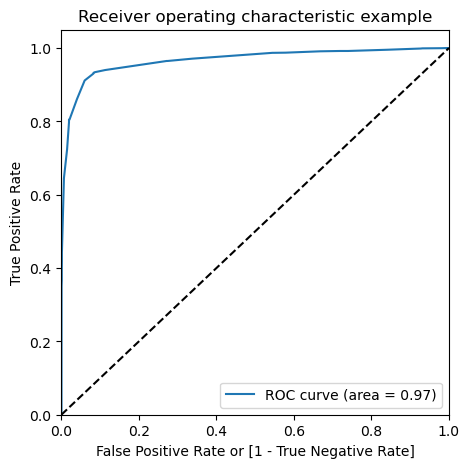

In [133]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

**Finding Optimal Cutoff Point**
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [136]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.077286,9196,0,7.728553,1,0,0,0,0,0,0,0,0,0
1,0,0.077286,4696,0,7.728553,1,0,0,0,0,0,0,0,0,0
2,0,0.544117,3274,1,54.411706,1,1,1,1,1,1,0,0,0,0
3,0,0.013929,2164,0,1.392893,1,0,0,0,0,0,0,0,0,0
4,1,0.960854,1667,1,96.085356,1,1,1,1,1,1,1,1,1,1


In [137]:
# Let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.818254  0.964780  0.728233
0.2   0.2  0.922930  0.932495  0.917053
0.3   0.3  0.922770  0.929140  0.918856
0.4   0.4  0.929153  0.911530  0.939979
0.5   0.5  0.929153  0.911530  0.939979
0.6   0.6  0.912877  0.805451  0.978877
0.7   0.7  0.913356  0.804193  0.980422
0.8   0.8  0.913356  0.804193  0.980422
0.9   0.9  0.910803  0.797484  0.980422


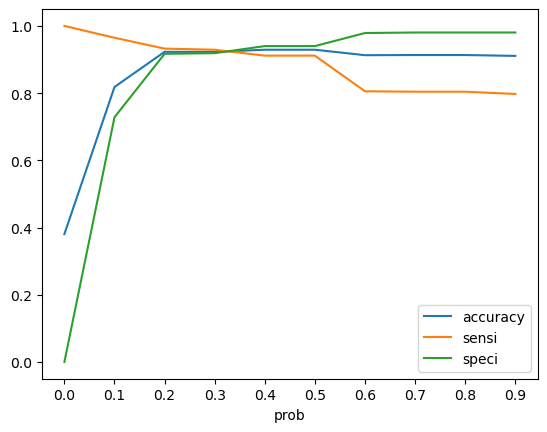

In [138]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

In [139]:
#### From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.32 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,lead_score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.077286,9196,0,7.728553,1,0,0,0,0,0,0,0,0,0,0
1,0,0.077286,4696,0,7.728553,1,0,0,0,0,0,0,0,0,0,0
2,0,0.544117,3274,1,54.411706,1,1,1,1,1,1,0,0,0,0,1
3,0,0.013929,2164,0,1.392893,1,0,0,0,0,0,0,0,0,0,0
4,1,0.960854,1667,1,96.085356,1,1,1,1,1,1,1,1,1,1,1


In [140]:

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.077286,9196,0,8
1,0,0.077286,4696,0,8
2,0,0.544117,3274,1,54
3,0,0.013929,2164,0,1
4,1,0.960854,1667,1,96


In [141]:
# Let's check the overall accuracy.

print('Accuracy :', round((metrics.accuracy_score(y_train_pred_final.Converted, 
                                                    y_train_pred_final.Predicted))*100,3))

Accuracy : 92.915


In [142]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3567,  315],
       [ 169, 2216]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',round((TP / float(TP+FN))*100,2))

# Let us calculate specificity
print('Specificity : ',round((TN / float(TN+FP))*100,2))

# Calculate False Postive Rate - predicting conversion when customer does not convert
print('False Positive Rate :', round(FP/ float(TN+FP),2))

# positive predictive value 
print("Positive Predictive Value :",round(TP / float(TP+FP),2))

# Negative predictive value
print("Negative predictive value :",round(TN / float(TN+ FN),2))

Sensitivity :  92.91
Specificity :  91.89
False Positive Rate : 0.08
Positive Predictive Value : 0.88
Negative predictive value : 0.95


*Observation:**

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

- Accuracy    : 92.915%
- Sensitivity : 92.91%
- Specificity : 91.89%

Some of the other Stats are derived below indicating the Precision & Recall.

#### Precision and Recall

- **Precision** = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
- **Recall** = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [147]:
# Precision
TP / TP + FP

print("Precision : ",round((confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])*100),2))

# Recall
TP / TP + FN

print("Recall :",round((confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))*100,2))

Precision :  87.55
Recall : 92.91


In [148]:
#### Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score
print("Precision :",round((precision_score(y_train_pred_final.Converted , 
                                            y_train_pred_final.final_Predicted))*100, 2))
print("Recall :",round((recall_score(y_train_pred_final.Converted, 
                                        y_train_pred_final.final_Predicted))*100,2))

Precision : 87.55
Recall : 92.91


In [149]:
#### Precision and recall tradeof
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, 
                                            y_train_pred_final.Converted_prob)

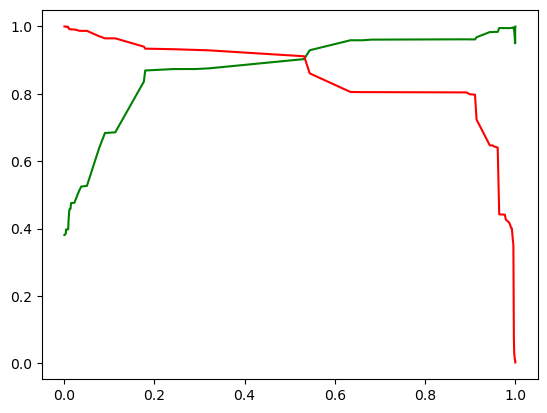

In [150]:
# plotting a trade-off curve between precision and recall

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# predictions on the test set

#### Scaling the Test data

In [152]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,-0.301634,0.575687,-0.311318,0.092860,1.448461,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
984,-0.301634,-0.090676,-0.550262,0.356568,1.448461,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8135,3.315278,-0.423857,0.812462,-0.170849,1.448461,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6915,-0.301634,0.242505,-0.628665,-0.170849,1.448461,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
2712,-0.301634,-0.090676,-0.421456,0.356568,-0.690388,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [153]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[rfe_fet]
X_test.head()

,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,What is your current occupation_Not Provided,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
7681,0,0,0,0,0,0,0,0,1,0,0,1
984,0,0,0,0,0,0,0,1,0,0,0,0
8135,0,0,0,1,0,0,0,0,0,0,0,1
6915,0,0,1,0,0,0,0,0,1,0,0,0
2712,0,0,1,0,0,0,0,0,0,1,0,0


In [154]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681    0.077286
984     0.009417
8135    0.544117
6915    0.008871
2712    0.960854
244     0.003698
4698    0.009417
8287    0.050238
6791    0.960854
8970    0.013929
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's check the head of the data
y_pred_1.head()

,0
7681,0.077286
984,0.009417
8135,0.544117
6915,0.008871
2712,0.960854


In [156]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [157]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing index for both dataframes to append them side by side.

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.077286
1,0,984,0.009417
2,0,8135,0.544117
3,0,6915,0.008871
4,1,2712,0.960854


In [160]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.077286
1,0,984,0.009417
2,0,8135,0.544117
3,0,6915,0.008871
4,1,2712,0.960854


In [161]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.077286,8
1,984,0,0.009417,1
2,8135,0,0.544117,54
3,6915,0,0.008871,1
4,2712,1,0.960854,96


In [162]:
# Makeing predictions on the test set using 0.32 as the cutoff

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.32 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.077286,8,0
1,984,0,0.009417,1,0
2,8135,0,0.544117,54,1
3,6915,0,0.008871,1,0
4,2712,1,0.960854,96,1


In [163]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.932241250930752

In [164]:
# Let's check the overall accuracy.
print('Accuracy :', round((metrics.accuracy_score(y_pred_final.Converted, 
                                                    y_pred_final.final_Predicted))*100,3))

Accuracy : 93.224


In [165]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, 
                                        y_pred_final.final_Predicted )
confusion2

array([[1549,  127],
       [  55,  955]], dtype=int64)

In [166]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
print("Precision :",round((precision_score(y_pred_final.Converted , 
                                                y_pred_final.final_Predicted))*100,2))
print("Recall :",round((recall_score(y_pred_final.Converted, 
                                                y_pred_final.final_Predicted))*100,2))

Precision : 88.26
Recall : 94.55


In [168]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',round((TP / float(TP+FN))*100,2))

# Let us calculate specificity
print('Specificity : ',round((TN / float(TN+FP))*100,2))

# Calculate False Postive Rate - predicting conversion when customer does not convert
print('False Positive Rate :', round(FP/ float(TN+FP),2))

# positive predictive value 
print("Positive Predictive Value :",round(TP / float(TP+FP),2))

# Negative predictive value
print("Negative predictive value :",round(TN / float(TN+ FN),2))

Sensitivity :  94.55
Specificity :  92.42
False Positive Rate : 0.08
Positive Predictive Value : 0.88
Negative predictive value : 0.97


**Observation:**
After running the model on the Test Data these are the figures we obtain:

- Accuracy : 93.224%
- Sensitivity : 94.55%
- Specificity : 92.42%

Thus we have achieved our goal of getting the target lead conversion rate to be around 93% . The Model seems to predict the Conversion Rate prety well and we should be able to give the CEO confidence in making good deceission based on this model to get a higher lead conversion rate of ~90%.

#### Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [172]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
4,2712,1,0.960854,96,1
8,6791,1,0.960854,96,1
12,1026,1,0.960854,96,1
13,5167,1,0.995665,100,1
15,5391,1,0.960854,96,1


In [173]:
hot_leads.shape

(864, 5)

In [174]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([2712, 6791, 1026, 5167, 5391, 8650, 4683, 1594, 7068, 1927, 1509,
       5036, 3268, 1311, 5051, 5340, 2500, 8622, 7840, 2709, 7051, 5011,
       2521, 9020, 3511, 4769, 5649, 6984, 1003, 8977, 3249, 4890, 2853,
       2159, 1188, 2617, 5769, 7888, 7268,   75, 2623, 8409,  216, 5373,
       2562, 8625, 4674, 2392, 7989, 7438,  943,  777, 6197,  568, 4612,
       7536,  973, 1932, 4331, 3616, 7707, 8228, 2657, 3412, 3586, 1950,
       7523, 1643, 7686, 4259, 6456, 2570,   82,  460, 7329, 5747, 1332,
       5000, 4646, 2703, 3953, 4634, 3095, 5827, 7470, 6230, 4682, 5061,
       3307, 3465, 8588,  187, 8749, 9037, 4793, 7895, 4803, 7126, 5753,
       6843, 3781, 5474, 6816, 5662, 5752, 5096, 1805, 1549, 3123, 2042,
       1404, 6711, 1573, 3120, 2118, 1056,   22, 4977, 8243, 9197, 1586,
       2243, 8980, 4132, 2984, 4782, 4788, 5071, 1157, 5506, 4320, 4061,
       5194, 4398, 6698, 1809, 4739, 2014, 3839,  764, 8966, 6294, 5035,
        225, 5205,  807, 7570, 7150, 5206, 2444, 83

In [175]:
#### Finding out the Important Features from our final model:
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                         5.605953
Tags_Lost to EINS                               5.048877
Lead Source_Welingak Website                    3.703717
Last Notable Activity_SMS Sent                  3.116364
Tags_Will revert after reading the email        3.072801
Last Notable Activity_Other_Notable_activity    1.419419
Last Activity_Email Opened                      0.880125
const                                          -0.752413
Last Activity_Email Bounced                    -1.557856
What is your current occupation_Not Provided   -2.187022
Tags_Interested in other courses               -3.507347
Tags_Other_Tags                                -3.903379
Tags_Ringing                                   -4.843763
dtype: float64

## Recommendations:

Should Make Calls (Leads Likely to Convert):
- Call leads tagged as "Closed by Horizzon".
- Call leads tagged as "Lost to EINS".
- Call leads tagged as "Will revert after reading the email".
- Call leads from the "Welingak Website" lead source.
- Call leads whose Last Notable Activity was "SMS Sent".
- Call leads whose Last Activity was "Email Opened"


Should Not Make Calls (Leads Unlikely to Convert):
- Avoid calling leads who have "Not Provided" their current occupation.
- Avoid calling leads with tags "Ringing", "Other_Tags", or "Interested in other courses".